<a href="https://colab.research.google.com/github/tripathiosho/ImportantNotebooks/blob/main/Naive_bayes_Practicals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
!gdown 1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8

Downloading...
From: https://drive.google.com/uc?id=1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8
To: /content/spam_clean.csv
100% 484k/484k [00:00<00:00, 24.5MB/s]


In [ ]:
df = pd.read_csv('spam_clean.csv', encoding='latin-1')
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


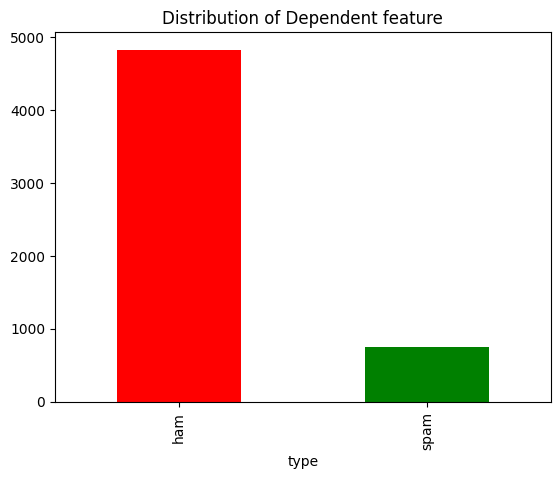

In [ ]:
freq = pd.value_counts(df["type"], sort= True)
freq.plot(kind= 'bar', color= ["red", "green"])
plt.title('Distribution of Dependent feature')
plt.show()

In [ ]:
# Libraries for text processing
import re, nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

def clean_tokenized_sentence(s):
    """Performs basic cleaning of a tokenized sentence"""
    cleaned_s = ""  # Create empty string to store processed sentence.
    words = nltk.word_tokenize(s)
    for word in words:
        # Convert to lowercase #
        c_word = word.lower()
        # Remove punctuations #
        c_word = re.sub(r'[^\w\s]', '', c_word)
        # Remove stopwords #
        if c_word != '' and c_word not in stopwords.words('english'):
            cleaned_s = cleaned_s + " " + c_word    # Append processed words to new list.
    return(cleaned_s.strip())

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df["cleaned_message"] = df["message"].apply(clean_tokenized_sentence)
df.head(10)

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
5,spam,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling 3 week word back like fun ...
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
7,ham,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,spam,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,spam,Had your mobile 11 months or more? U R entitle...,mobile 11 months u r entitled update latest co...


In [ ]:

ham = df[df['type'] == 'ham']
ham

,type,message,cleaned_message
0,ham,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,ok lar joking wif u oni
3,ham,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",nah nt think goes usf lives around though
6,ham,Even my brother is not like to speak with me. ...,even brother like speak treat like aids patent
...,...,...,...
5565,ham,Huh y lei...,huh lei
5568,ham,Will Ì_ b going to esplanade fr home?,ì_ b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,guy bitching acted like interested buying some...


In [ ]:
ham = ham['cleaned_message']
ham

,cleaned_message
0,go jurong point crazy available bugis n great ...
1,ok lar joking wif u oni
3,u dun say early hor u c already say
4,nah nt think goes usf lives around though
6,even brother like speak treat like aids patent
...,...
5565,huh lei
5568,ì_ b going esplanade fr home
5569,pity mood suggestions
5570,guy bitching acted like interested buying some...


In [ ]:

ham = " ".join(ham)
ham

'go jurong point crazy available bugis n great world la e buffet cine got amore wat ok lar joking wif u oni u dun say early hor u c already say nah nt think goes usf lives around though even brother like speak treat like aids patent per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune gon na home soon nt want talk stuff anymore tonight k cried enough today searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times date sunday oh k watching eh u remember 2 spell name yes v naughty make v wet fine thatåõs way u feel thatåõs way gota b seriously spell name iûm going try 2 months ha ha joking ì_ pay first lar da stock comin aft finish lunch go str lor ard 3 smth lor u finish ur lunch already ffffffffff alright way meet sooner forced eat slice really hungry tho sucks mark getting worried knows sick turn pizza lol lol always convincing catch bus frying egg make tea eating mom left di

In [ ]:

ham = ham.split()
ham

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'nt',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 '9',
 'copy',
 'friends',
 'callertune',
 'gon',
 'na',
 'home',
 'soon',
 'nt',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cried',
 'enough',
 'today',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'oh',
 'k',
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 'spell',
 'name',
 'yes',


In [ ]:
counter_ham = Counter(ham).most_common(20)
counter_ham

[('u', 1004),
 ('nt', 360),
 ('gt', 318),
 ('lt', 316),
 ('2', 309),
 ('get', 303),
 ('ok', 279),
 ('go', 248),
 ('got', 244),
 ('ur', 241),
 ('know', 236),
 ('like', 231),
 ('call', 231),
 ('good', 229),
 ('come', 227),
 ('time', 197),
 ('day', 192),
 ('love', 191),
 ('4', 172),
 ('going', 169)]

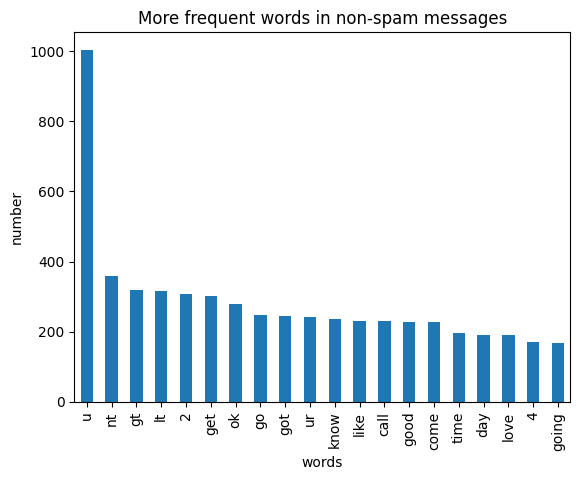

In [ ]:
# load the results as a pandas dataframe in order to plot
df_ham = pd.DataFrame(counter_ham)

# Renaming the columns in this dataframe
df_ham = df_ham.rename(columns={0:"words in non-spam", 1:"count"})

# Plotting the data
df_ham.plot.bar(legend = False)
y_pos = np.arange(len(df_ham["words in non-spam"]))
plt.xticks(y_pos, df_ham["words in non-spam"])
plt.title('More frequent words in non-spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

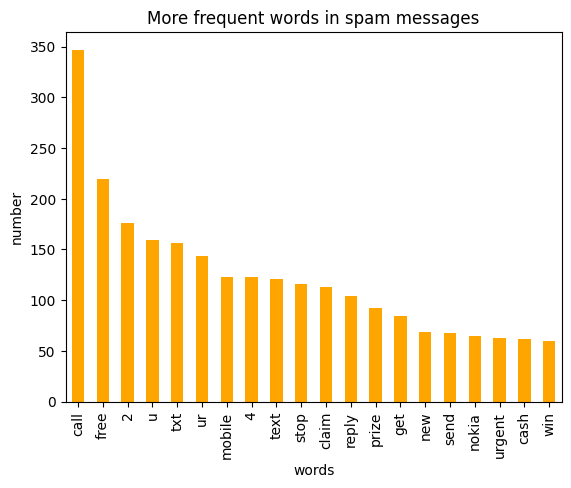

In [ ]:
# Invoking the Counter() object on a list of words occuring in the "cleaned_message" column of spam texts, joined together
counter_spam = Counter(" ".join(df[df['type']=='spam']["cleaned_message"]).split()).most_common(20)

# load the results as a pandas dataframe in order to plot
df_spam = pd.DataFrame(counter_spam)

# Renaming the columns in this dataframe
df_spam = df_spam.rename(columns={0:"words in spam", 1:"count_"})

# Plotting the data
df_spam.plot.bar(legend = False, color = 'orange')
y_pos = np.arange(len(df_spam["words in spam"]))
plt.xticks(y_pos, df_spam["words in spam"])
plt.title('More frequent words in spam messages')
plt.xlabel('words')
plt.ylabel('number')
plt.show()

In [ ]:
df["type"] = df["type"].map({'spam':1,'ham':0})

In [ ]:
from sklearn.model_selection import train_test_split

df_X_train, df_X_test, y_train, y_test = train_test_split(df['cleaned_message'], df['type'], test_size=0.25, random_state=42)
print([np.shape(df_X_train), np.shape(df_X_test)])

[(4179,), (1393,)]


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer


In [ ]:
f = CountVectorizer()
X_train = f.fit_transform(df_X_train)
X_test=f.transform(df_X_test)

In [ ]:
X_train.shape

(4179, 7615)

In [ ]:
from sklearn import naive_bayes
from sklearn.model_selection import GridSearchCV


params = {'alpha':[0.01, 0.1, 1, 10] }
mnb = naive_bayes.MultinomialNB()
clf = GridSearchCV(mnb, params, scoring = "f1", cv=3)

clf.fit(X_train, y_train)

res = clf.cv_results_

In [ ]:
mnb.fit(X_train, y_train)

MultinomialNB()

In [ ]:
res

{'mean_fit_time': array([0.00462357, 0.00262221, 0.00287803, 0.00276335]),
 'std_fit_time': array([2.50989483e-03, 2.91094234e-05, 2.64831736e-04, 1.64154996e-04]),
 'mean_score_time': array([0.00361172, 0.00284378, 0.00343235, 0.00314959]),
 'std_score_time': array([6.11061821e-04, 5.65557593e-05, 4.46461112e-04, 2.56516109e-04]),
 'param_alpha': masked_array(data=[0.01, 0.1, 1.0, 10.0],
              mask=[False, False, False, False],
        fill_value=1e+20),
 'params': [{'alpha': 0.01}, {'alpha': 0.1}, {'alpha': 1}, {'alpha': 10}],
 'split0_test_score': array([0.88888889, 0.895     , 0.9119171 , 0.89880952]),
 'split1_test_score': array([0.88888889, 0.90625   , 0.91105121, 0.8375    ]),
 'split2_test_score': array([0.90339426, 0.86783042, 0.88372093, 0.8447205 ]),
 'mean_test_score': array([0.89372401, 0.88969347, 0.90222975, 0.86034334]),
 'std_test_score': array([0.0068379 , 0.01612731, 0.01309248, 0.02735896]),
 'rank_test_score': array([2, 3, 1, 4], dtype=int32)}

In [ ]:
y_pred=mnb.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1202
           1       0.96      0.89      0.92       191

    accuracy                           0.98      1393
   macro avg       0.97      0.94      0.95      1393
weighted avg       0.98      0.98      0.98      1393

